<a href="https://colab.research.google.com/github/pabloga44/TFG/blob/main/3params_bueno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo para 3 parámetros, dataset grande

##Librerías

In [3]:
import sys
import os
import matplotlib.pyplot as plt # for plotting
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!git clone https://github.com/pabloga44/TFG

Cloning into 'TFG'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 186 (delta 104), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (186/186), 2.00 MiB | 5.21 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [6]:
sys.path.insert(0,'/content/TFG')

In [7]:
#Librerias de GitHub
import main as mn
import paint as pt

##Importar datos

In [21]:
InPath = '/content/TFG/data/Input_all_clean.txt'
OutPath = '/content/TFG/data/Output_all_clean.txt'
FrecPath = '/content/TFG/data/Frequencies.txt'

l,x,y = mn.get_data(FrecPath,InPath,OutPath,clean=False)

#Pasamos los ejes a un rango normal
for i in range(x.shape[0]):
    x[i][0] *= 10e7
    x[i][1] *= 10e7

#Separación
x_train,x_validation,x_test,y_train,y_validation,y_test=mn.split_data_Pablo(x,y)

###Ploteamos algunas

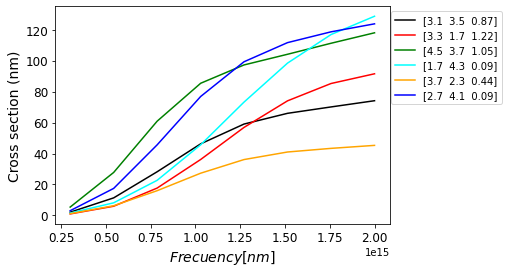

In [22]:
# ES UTIL ANTES DE ENTRAR LA RED PINTAR LAS SECCIONES QUE VAN A SALIR LUEGO EN EL TEST, 
# PARA VER SI HA HABIDO SUERTE Y SON DIVERSAS Y TIENEN PINTA DE COMPLICADAS 
pt.paint_spectra(l,x_test,y_test)

##Modelo

In [25]:
model,history= mn.train_model_3params(x_train,x_test,y_train,y_test,optimizer='Adam',actfun='relu',lr=5e-4,neurons=100,num_epochs=1000,verb=1,hidden=3)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               400       
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 808       
Total params: 21,408
Trainable params: 21,408
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
49/49 [==============================] - 1s 8ms/step - loss: 3401.2397 - mae: 46.0494 - val_loss: 2983.7021 - val_mae: 41.8324
Epoch 2/1000
49/49 [==============================] - 0s 4ms/step - loss: 2249.1496 - mae: 35.1602 - val_los

##Probar modelo

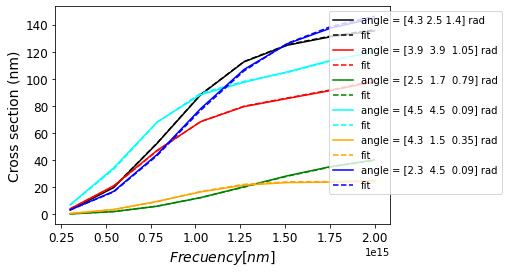

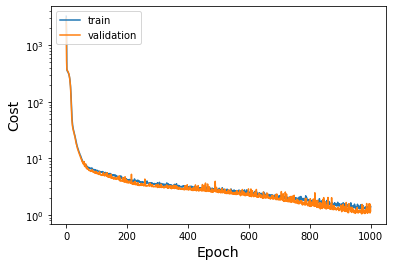

In [26]:
pt.paint_predictions(model,l,x_validation,y_validation)
pt.paint_costs(history)

##Guardar modelo

In [28]:
pathsave = '/content/drive/MyDrive/Colab Notebooks/TFG/Modelos/3params'
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave,key='Adam_relu_5e-4_100n_')

Model saved correctly!
